In [1]:
import numpy as np
import pandas as pd
import io
import pickle
import os
import seaborn as sns
from matplotlib import pyplot as plt

import codicefiscale  # cool library to check fiscal code

## Dataset exploration: OpenCUP "TOTALE.csv"


In [2]:
chached_name = 'loadedPandasAscii.pickle'
try:
    with open(chached_name, 'rb') as f:
        all_cup = pickle.load(f)
except IOError:
    all_cup = pd.read_csv('TOTALE.csv', 
                      sep='|', quoting=3, encoding='ascii', 
                      error_bad_lines=False, warn_bad_lines=True)
    all_cup.to_pickle(chached_name)

In [3]:
def readlines(i_start, i_end):
    out = ''
    with open('TOTALE.csv', 'r') as f:
        for i_row , row in enumerate(f):
            if i_row < i_start:
                continue
            elif i_row <= i_end:
                out = out + row
            else:
                df = pd.read_csv(io.StringIO(out), 
                      sep='|', quoting=3, encoding='ascii',header=None,
                      error_bad_lines=False, warn_bad_lines=True)
                return out, df
            

In [4]:
goodFraction = 1-all_cup.sample(20000).isnull().mean(axis=0)
goodFraction.sort_values(ascending=False, inplace=True)
cup = all_cup.copy()
print(goodFraction.index[goodFraction < 0.3])
#cup = all_cup[goodFraction[goodFraction > 0.3].index].copy()

Index(['ALTRE_INFORMAZIONI', 'DATA_ULTIMA_MODIFICA_SSC', 'LINK_OPENCOESIONE',
       'RAGIONI_COLLEGAMENTO', 'CUP_MASTER', 'DENOMINAZIONE_BENEFICIARIO',
       'DATA_ULTIMA_MODIFICA_UTENTE', 'DENO_IMPRESA_STABILIMENTO_PREC',
       'LINK_SCUOLE_SICURE', 'CUP_IN_RELAZIONE', 'RUOLO_IN_RELAZIONE',
       'DESC_TIPO_RELAZIONE'],
      dtype='object')


In [7]:
# Anno delibera ha diversi typo. Estraiamoli.
bad_anno_delibera = cup[~cup.ANNO_DELIBERA.isin(
    ['DATO NON PRESENTE']+[str(x) for x in np.arange(1980,2021)])
                 ]
bad_anno_delibera.to_csv('bad_annodelibera.csv', index_label='numero_riga_0_based', sep=';')

In [9]:
_,df = readlines(5417, 5420)
print(df[56])
pd.read_csv('bad_annodelibera.csv', sep = ';')

0    DATO NON PRESENTE
1    DATO NON PRESENTE
2                  NaN
3    DATO NON PRESENTE
Name: 56, dtype: object


,numero_riga_0_based,CUP,DESCRIZIONE_SINTETICA_CUP,ANNO_DECISIONE,STATO_PROGETTO,COSTO_PROGETTO,FINANZIAMENTO_PROGETTO,CODICE_STATO,STATO,CODICE_AREA_GEOGRAFICA,...,COD_DIVISIONE_ATECO,DIVISIONE_ATECO,COD_GRUPPO_ATECO,GRUPPO_ATECO,COD_CLASSE_ATECO,CLASSE_ATECO,COD_CATEGORIA_ATECO,CATEGORIA_ATECO,COD_SOTTOCATEG_ATECO,SOTTOCATEGORIA_ATECO
0,5418,E79G17000080009,AZIENDA AGRICOLA ESTER DI BETTINAGLIO MICHELE...,2017,ATTIVO,30000,30000,5,ITALIA,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62689,E39G17000650009,SOCIETA' AGRICOLA COCCHETTI E BERTOLAZZI DI B...,2017,ATTIVO,30000,30000,5,ITALIA,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,97169,F87B14000970008,CUCINOTTA CONSULTING S.A.S. DI CUCINOTTA ALBA...,2014,CHIUSO,27525,20644,5,ITALIA,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,97170,F87B14000970008,CUCINOTTA CONSULTING S.A.S. DI CUCINOTTA ALBA...,2014,CHIUSO,27525,20644,5,ITALIA,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,113838,E29G17000030009,AZIENDA AGRICOLA MANZONI CLAUDIO*Incentivi pe...,2017,ATTIVO,30000,30000,5,ITALIA,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,156832,B89G08000080009,POLITI MARIA COSTANZA*AMMODERNAMENTO*VIA STRAD...,2008,ATTIVO,74287,33865,5,ITALIA,S,...,47.0,COMMERCIO AL DETTAGLIO (ESCLUSO QUELLO DI AUTO...,47.2,"COMMERCIO AL DETTAGLIO DI PRODOTTI ALIMENTARI,...",47.29,Commercio al dettaglio di altri prodotti alime...,47.29.9,Commercio al dettaglio di altri prodotti alime...,47.29.90,Commercio al dettaglio di altri prodotti alime...
6,165323,E39G17000650009,SOCIETA' AGRICOLA COCCHETTI E BERTOLAZZI DI B...,2017,ATTIVO,30000,30000,5,ITALIA,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,203199,E59G17000090009,GIARDINO DELL'EDEN DI CANOVA ENEA*Incentivi p...,2017,ATTIVO,30000,30000,5,ITALIA,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,250434,E24H16000630004,LAVORI DI ALLACCIAMENTO DEGLI SCARICHI ALLA FO...,2016,ATTIVO,16322,16322,5,ITALIA,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,251156,F87B14000970008,CUCINOTTA CONSULTING S.A.S. DI CUCINOTTA ALBA...,2014,CHIUSO,27525,20644,5,ITALIA,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# evaluate number of distinct field values
n_uniques = cup.nunique()

In [63]:
cup_many_rows = cup[cup.CUP=='B66I10000760007']  # this CUP has 340 rows
cup_many_rows

,CUP,DESCRIZIONE_SINTETICA_CUP,ANNO_DECISIONE,STATO_PROGETTO,COSTO_PROGETTO,FINANZIAMENTO_PROGETTO,CODICE_STATO,STATO,CODICE_AREA_GEOGRAFICA,AREA_GEOGRAFICA,...,COD_GRUPPO_ATECO,GRUPPO_ATECO,COD_CLASSE_ATECO,CLASSE_ATECO,COD_CATEGORIA_ATECO,CATEGORIA_ATECO,COD_SOTTOCATEG_ATECO,SOTTOCATEGORIA_ATECO,log_COSTO_PROGETTO,short_CATEGORIA_INTERVENTO
2935,B66I10000760007,IDEE E DECORI DI CRISTINA MURA*MIGLIORAMENTO D...,2010,CHIUSO,18271,11876,5,ITALIA,I,ISOLE,...,47.7,COMMERCIO AL DETTAGLIO DI ALTRI PRODOTTI IN ES...,47.78,Commercio al dettaglio di altri prodotti (escl...,47.78.9,Commercio al dettaglio di altri prodotti non a...,47.78.91,"Commercio al dettaglio di filatelia, numismati...",9.81307,ALTRE INFRASTRUTTURE PER ATTREZZATURE DI AREE ...
2936,B66I10000760007,IDEE E DECORI DI CRISTINA MURA*MIGLIORAMENTO D...,2010,CHIUSO,18271,11876,5,ITALIA,I,ISOLE,...,47.7,COMMERCIO AL DETTAGLIO DI ALTRI PRODOTTI IN ES...,47.78,Commercio al dettaglio di altri prodotti (escl...,47.78.9,Commercio al dettaglio di altri prodotti non a...,47.78.99,Commercio al dettaglio di altri prodotti non a...,9.81307,ALTRE INFRASTRUTTURE PER ATTREZZATURE DI AREE ...
54046,B66I10000760007,IDEE E DECORI DI CRISTINA MURA*MIGLIORAMENTO D...,2010,CHIUSO,18271,11876,5,ITALIA,I,ISOLE,...,47.7,COMMERCIO AL DETTAGLIO DI ALTRI PRODOTTI IN ES...,47.78,Commercio al dettaglio di altri prodotti (escl...,47.78.9,Commercio al dettaglio di altri prodotti non a...,47.78.93,Commercio al dettaglio di articoli funerari e ...,9.81307,ALTRE INFRASTRUTTURE PER ATTREZZATURE DI AREE ...
54047,B66I10000760007,IDEE E DECORI DI CRISTINA MURA*MIGLIORAMENTO D...,2010,CHIUSO,18271,11876,5,ITALIA,I,ISOLE,...,47.7,COMMERCIO AL DETTAGLIO DI ALTRI PRODOTTI IN ES...,47.78,Commercio al dettaglio di altri prodotti (escl...,47.78.9,Commercio al dettaglio di altri prodotti non a...,47.78.93,Commercio al dettaglio di articoli funerari e ...,9.81307,ALTRE INFRASTRUTTURE PER ATTREZZATURE DI AREE ...
54048,B66I10000760007,IDEE E DECORI DI CRISTINA MURA*MIGLIORAMENTO D...,2010,CHIUSO,18271,11876,5,ITALIA,I,ISOLE,...,47.7,COMMERCIO AL DETTAGLIO DI ALTRI PRODOTTI IN ES...,47.78,Commercio al dettaglio di altri prodotti (escl...,47.78.3,Commercio al dettaglio di oggetti d'arte di cu...,47.78.35,Commercio al dettaglio di bomboniere,9.81307,ALTRE INFRASTRUTTURE PER ATTREZZATURE DI AREE ...
54049,B66I10000760007,IDEE E DECORI DI CRISTINA MURA*MIGLIORAMENTO D...,2010,CHIUSO,18271,11876,5,ITALIA,I,ISOLE,...,47.7,COMMERCIO AL DETTAGLIO DI ALTRI PRODOTTI IN ES...,47.78,Commercio al dettaglio di altri prodotti (escl...,47.78.3,Commercio al dettaglio di oggetti d'arte di cu...,47.78.36,Commercio al dettaglio di chincaglieria e bigi...,9.81307,ALTRE INFRASTRUTTURE PER ATTREZZATURE DI AREE ...
105432,B66I10000760007,IDEE E DECORI DI CRISTINA MURA*MIGLIORAMENTO D...,2010,CHIUSO,18271,11876,5,ITALIA,I,ISOLE,...,47.7,COMMERCIO AL DETTAGLIO DI ALTRI PRODOTTI IN ES...,47.78,Commercio al dettaglio di altri prodotti (escl...,47.78.4,Commercio al dettaglio di combustibile per uso...,47.78.40,Commercio al dettaglio di combustibile per uso...,9.81307,ALTRE INFRASTRUTTURE PER ATTREZZATURE DI AREE ...
156642,B66I10000760007,IDEE E DECORI DI CRISTINA MURA*MIGLIORAMENTO D...,2010,CHIUSO,18271,11876,5,ITALIA,I,ISOLE,...,47.7,COMMERCIO AL DETTAGLIO DI ALTRI PRODOTTI IN ES...,47.78,Commercio al dettaglio di altri prodotti (escl...,47.78.3,Commercio al dettaglio di oggetti d'arte di cu...,47.78.36,Commercio al dettaglio di chincaglieria e bigi...,9.81307,ALTRE INFRASTRUTTURE PER ATTREZZATURE DI AREE ...
156643,B66I10000760007,IDEE E DECORI DI CRISTINA MURA*MIGLIORAMENTO D...,2010,CHIUSO,18271,11876,5,ITALIA,I,ISOLE,...,47.7,COMMERCIO AL DETTAGLIO DI ALTRI PRODOTTI IN ES...,47.78,Commercio al dettaglio di altri prodotti (escl...,47.78.3,Commercio al dettaglio di oggetti d'arte di cu...,47.78.33,Commercio al dettaglio di arredi sacri ed arti...,9.81307,ALTRE INFRASTRUTTURE PER ATTREZZATURE DI AREE ...
208172,B66I10000760007,IDEE E DECORI D

In [11]:
cup.groupby(['STATO_PROGETTO'])['DATA_CHIUSURA_REVOCA'].count()

STATO_PROGETTO
ATTIVO         35
CHIUSO    2041601
Name: DATA_CHIUSURA_REVOCA, dtype: int64

In [12]:
# check CUP assignment dates
yy = pd.to_datetime(cup.DATA_GENERAZIONE_CUP.sample(20000), infer_datetime_format=True)
(yy > pd.to_datetime('2002')).mean()

0.99995

In [13]:
# Check distribution in various countries
cup.groupby(
    ['STATO_PROGETTO', 'STATO'])['COSTO_PROGETTO'].sum().sort_values(ascending=False)

STATO_PROGETTO  STATO                            
ATTIVO          ITALIA                               4159751597991
CHIUSO          ITALIA                               1138711394700
ATTIVO          NON DEFINITO                              70300000
                FRANCIA                                   40377382
                GERMANIA                                  35657578
                SLOVENIA                                  32834143
                SPAGNA                                    31525358
                PAESI BASSI                               30381386
                REGNO UNITO                               28605913
                PORTOGALLO                                24053058
                AFGHANISTAN                               20181566
CHIUSO          POLONIA                                   18468278
                GERMANIA                                  17664006
                SPAGNA                                    16995528
            

In [14]:
print(cup.groupby('STATO_PROGETTO')['COSTO_PROGETTO'].sum())

STATO_PROGETTO
ATTIVO    4160145348300
CHIUSO    1138832450368
Name: COSTO_PROGETTO, dtype: int64


In [15]:
# compare project costs by their status
cup.groupby('STATO_PROGETTO').COSTO_PROGETTO.describe()

,count,mean,std,min,25%,50%,75%,max
STATO_PROGETTO,,,,,,,,
ATTIVO,4562274.0,911857.847271,3.743406e+07,1.0,8574.0,32000.0,153500.0,2.200000e+10
CHIUSO,2041658.0,557797.853690,1.168482e+07,1.0,7175.0,31799.0,123470.0,2.703291e+09


In [16]:
# add log of the cost as scale varies largely
cup['log_COSTO_PROGETTO'] = cup.COSTO_PROGETTO.apply(np.log)

In [17]:
cup['short_CATEGORIA_INTERVENTO'] = cup['CATEGORIA_INTERVENTO'].apply(lambda s: s[:80])

In [18]:
def plot_cost_by_column(column_name):
    nItems = cup[column_name].nunique()
    print('Found %i different categories' %nItems)
    print(cup.groupby(column_name).log_COSTO_PROGETTO.describe())
    # make some quick plots
    fig = plt.figure()
    fig.set_size_inches([16,10 *(1+nItems//8)])
    sns.violinplot(data=cup.sample(200000),
                   y=column_name, split=True,
                   x='log_COSTO_PROGETTO', hue='STATO_PROGETTO')
    plt.show()

Found 5 different categories
                                      count       mean       std  min  \
AREA_INTERVENTO                                                         
AMBIENTE ED ENERGIA                356311.0  12.075989  1.779545  0.0   
AREE PRODUTTIVE                   4585525.0  10.025202  2.023528  0.0   
IMMOBILI                           755912.0  11.448811  1.899145  0.0   
RICERCA, ITC, FORMAZIONE E ALTRO   513125.0  10.090790  2.549854  0.0   
TRASPORTI                          393059.0  12.151910  1.922769  0.0   

                                        25%        50%        75%        max  
AREA_INTERVENTO                                                               
AMBIENTE ED ENERGIA               11.002100  12.072541  13.133760  20.875419  
AREE PRODUTTIVE                    8.699515   9.961756  11.366164  22.616077  
IMMOBILI                          10.239960  11.512925  12.697715  21.862599  
RICERCA, ITC, FORMAZIONE E ALTRO   8.132706  10.016816  12.13176

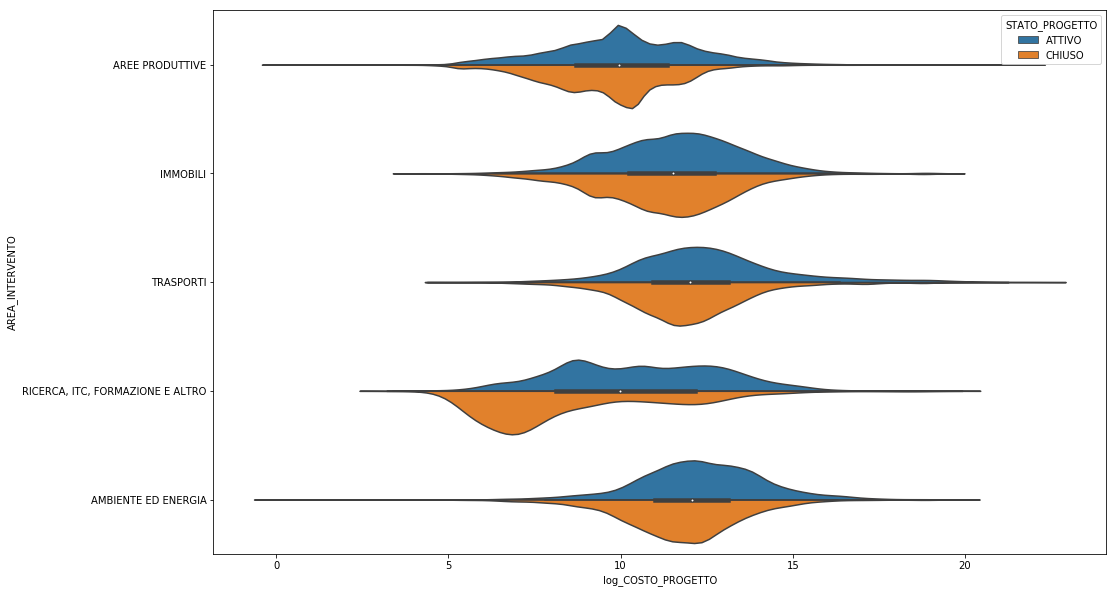

In [19]:
plot_cost_by_column('AREA_INTERVENTO')

In the above, we note that "RICERCA, ITC, FORMAZIONE E ALTRO" has a wide difference between closed and open projects. This could be investigated including project timing in the analysis.

Found 11 different categories
                                                        count       mean  \
SETTORE_INTERVENTO                                                         
INFRASTRUTTURE AMBIENTALI E RISORSE IDRICHE          285298.0  12.188421   
INFRASTRUTTURE DEL SETTORE ENERGETICO                 71013.0  11.624290   
INFRASTRUTTURE DI TRASPORTO                          393059.0  12.151910   
INFRASTRUTTURE PER L'ATTREZZATURA DI AREE PRODU...    59395.0  11.202128   
INFRASTRUTTURE PER TELECOMUNICAZIONI E TECNOLOG...    27691.0  10.614805   
INFRASTRUTTURE SOCIALI                               755912.0  11.448811   
ISTRUZIONE, FORMAZIONE E SOSTEGNI PER IL MERCAT...  1257330.0   9.561937   
OPERE, IMPIANTI ED ATTREZZATURE PER ATTIVITA' P...  2404588.0  10.505927   
RICERCA SVILUPPO TECNOLOGICO ED INNOVAZIONE          209047.0  11.890703   
SERVIZI ALLE IMPRESE                                1128779.0   9.105653   
SERVIZI PER LA P.A. E PER LA COLLETTIVITA'            1182

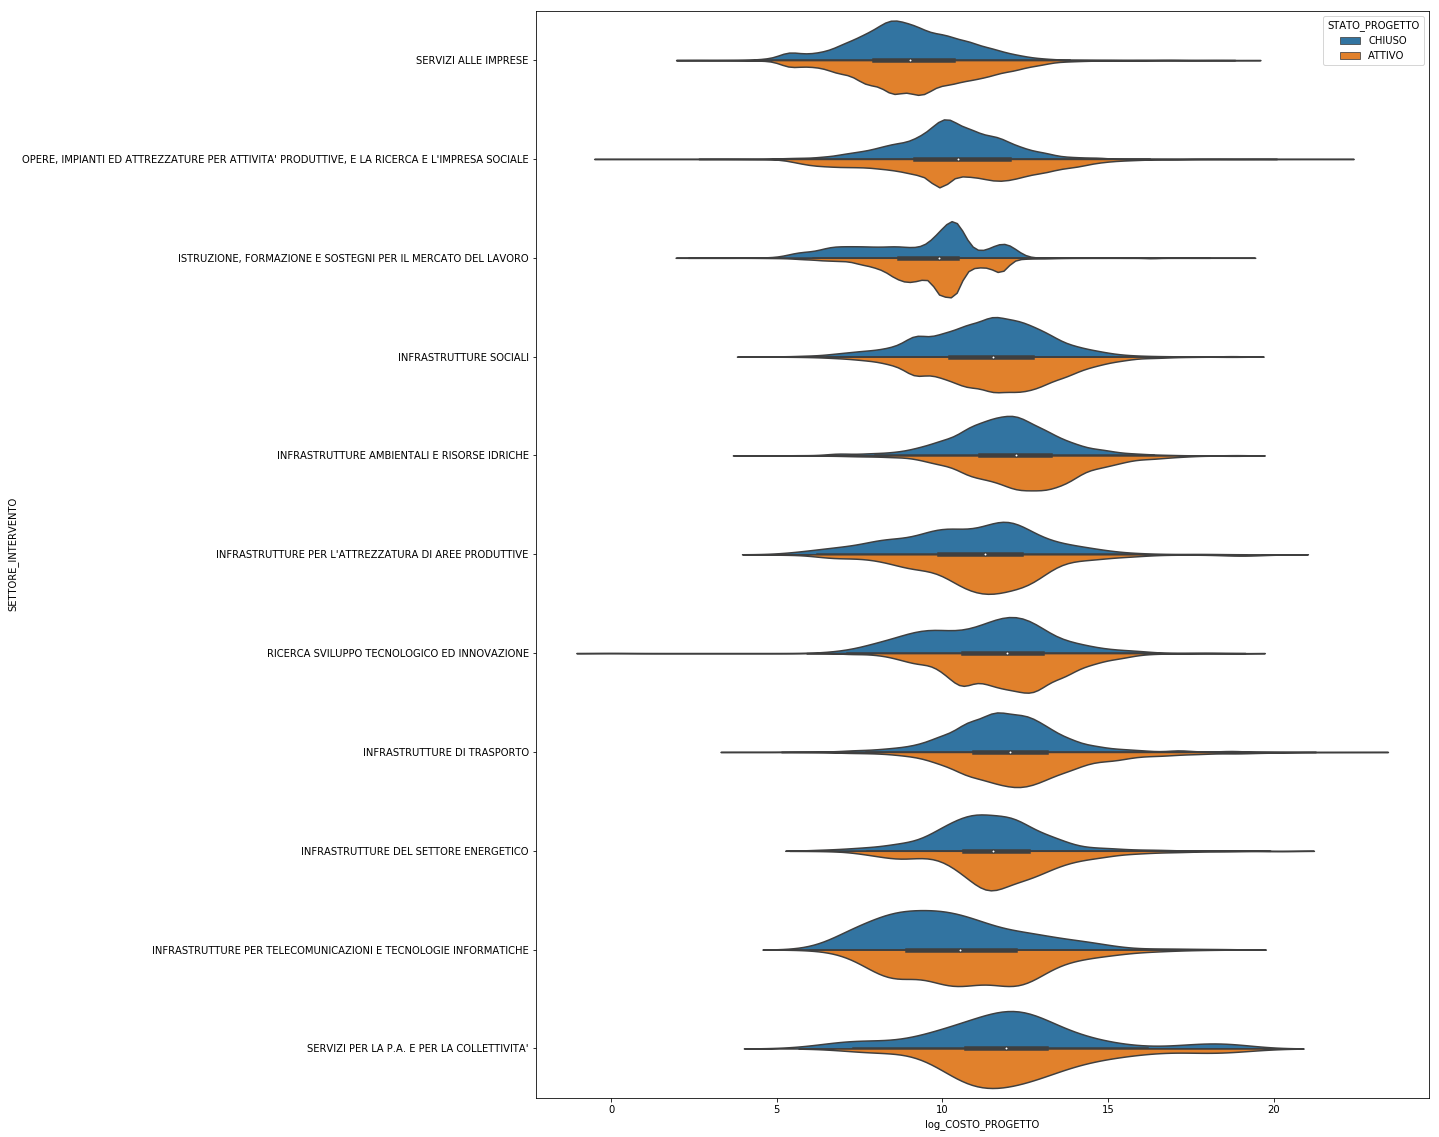

In [20]:
plot_cost_by_column('SETTORE_INTERVENTO')

In [21]:
chiusi = cup[~cup.DATA_CHIUSURA_REVOCA.isnull()].copy()

In [22]:
chiusi['year_CHIUSURA'] = '20'+chiusi.DATA_CHIUSURA_REVOCA.apply(lambda s: s[-2:])

In [28]:
# Show projects that are closed before they are "decided"... Sic.
bad_chiusura = chiusi[chiusi.ANNO_DECISIONE > chiusi['year_CHIUSURA'].astype(int)]
bad_chiusura = bad_chiusura.drop(['log_COSTO_PROGETTO', 'short_CATEGORIA_INTERVENTO'], axis=1)
bad_chiusura.to_csv('date_non_consistenti.csv', index_label='numero_riga_0_based', sep=';')

In [29]:
pd.read_csv('date_non_consistenti.csv', sep=';')

,numero_riga_0_based,CUP,DESCRIZIONE_SINTETICA_CUP,ANNO_DECISIONE,STATO_PROGETTO,COSTO_PROGETTO,FINANZIAMENTO_PROGETTO,CODICE_STATO,STATO,CODICE_AREA_GEOGRAFICA,...,DIVISIONE_ATECO,COD_GRUPPO_ATECO,GRUPPO_ATECO,COD_CLASSE_ATECO,CLASSE_ATECO,COD_CATEGORIA_ATECO,CATEGORIA_ATECO,COD_SOTTOCATEG_ATECO,SOTTOCATEGORIA_ATECO,year_CHIUSURA
0,55939,D21B07000040001,SOPPRESSIONE PASSAGGI A LIVELLO: VIABILITA' AL...,2007,CHIUSO,516457,516457,5,ITALIA,NO,...,AMMINISTRAZIONE PUBBLICA E DIFESA; ASSICURAZIO...,84.1,AMMINISTRAZIONE PUBBLICA: AMMINISTRAZIONE GENE...,84.11,Attivita generali di amministrazione pubblica,84.11.2,Attivita di pianificazione generale e servizi...,84.11.20,Attivita di pianificazione generale e servizi...,2006
1,84400,D89D16002340002,C.I. EL IMPIANTI SRL*L.R. 18/05 REGIONE FVG - ...,2017,CHIUSO,4500,4500,5,ITALIA,NE,...,LAVORI DI COSTRUZIONE SPECIALIZZATI,43.2,"INSTALLAZIONE DI IMPIANTI ELETTRICI, IDRAULICI...",43.21,Installazione di impianti elettrici,43.21.0,Installazione di impianti elettrici ed elettro...,43.21.03,Installazione impianti di illuminazione strada...,2016
2,195022,D69G16000730002,PUNTOFIT DI CESCHIUTTI MICHELA*L.R. 18/05 REGI...,2017,CHIUSO,1450,1450,5,ITALIA,NE,...,"ATTIVITA' SPORTIVE, DI INTRATTENIMENTO E DI DI...",93.1,ATTIVITA' SPORTIVE,93.11,Gestione di impianti sportivi,93.11.2,Gestione di piscine,93.11.20,Gestione di piscine,2016
3,346499,D29G16002130002,A.ED.F SRL*L.R. 18/05 REGIONE FVG - LAVORATORE...,2017,CHIUSO,1000,1000,5,ITALIA,NE,...,ATTIVITA' DEI SERVIZI DI RISTORAZIONE,56.1,RISTORANTI E ATTIVITA' DI RISTORAZIONE MOBILE,56.10,Ristoranti e attivita di ristorazione mobile,56.10.4,Ristorazione ambulante e gelaterie ambulanti,56.10.42,Ristorazione ambulante,2016
4,359312,D59G16001440002,"COGOI ROCCO - ""EDICOLA CENTRO""*L.R. 18/05 REGI...",2017,CHIUSO,980,980,5,ITALIA,NE,...,COMMERCIO AL DETTAGLIO (ESCLUSO QUELLO DI AUTO...,47.6,COMMERCIO AL DETTAGLIO DI ARTICOLI CULTURALI E...,47.62,Commercio al dettaglio di giornali e articoli ...,47.62.1,"Commercio al dettaglio di giornali, riviste e ...",47.62.10,"Commercio al dettaglio di giornali, riviste e ...",2016
5,751879,D89D16002340002,C.I. EL IMPIANTI SRL*L.R. 18/05 REGIONE FVG - ...,2017,CHIUSO,4500,4500,5,ITALIA,NE,...,LAVORI DI COSTRUZIONE SPECIALIZZATI,43.2,"INSTALLAZIONE DI IMPIANTI ELETTRICI, IDRAULICI...",43.21,Installazione di impianti elettrici,43.21.0,Installazione di impianti elettrici ed elettro...,43.21.01,Installazione di impianti elettrici in edifici...,2016
6,764088,D25B07000000002,RESTAURO E RISANAMENTO CONSERVATIVO EX SCUOLA ...,2007,CHIUSO,200000,200000,5,ITALIA,NO,...,AMMINISTRAZIONE PUBBLICA E DIFESA; ASSICURAZIO...,84.1,AMMINISTRAZIONE PUBBLICA: AMMINISTRAZIONE GENE...,84.11,Attivita generali di amministrazione pubblica,84.11.1,Attivita degli organi legislativi ed esecutiv...,84.11.10,Attivita degli organi legislativi ed esecutiv...,2006
7,800359,D21B07000050002,PISTA CICLABILE (ZONA CIMITERO - LOCALITA' BAR...,2007,CHIUSO,258228,258228,5,ITALIA,NO,...,AMMINISTRAZIONE PUBBLICA E DIFESA; ASSICURAZIO...,84.1,AMMINISTRAZIONE PUBBLICA: AMMINISTRAZIONE GENE...,84.11,Attivita generali di amministrazione pubblica,84.11.1,Attivita degli organi legislativi ed esecutiv...,84.11.10,Attivita degli organi legislativi ed esecutiv...,2006
8,981379,F78F07000060001,MANUTENZIONE ORDINARIA DIPINTI GALLERIA NAZIONALE,2007,CHIUSO,60000,60000,5,ITALIA,NE,...,AMMINISTRAZIONE PUBBLICA E DIFESA; ASSICURAZIO...,84.1,AMMINISTRAZIONE PUBBLICA: AMMINISTRAZIONE GENE...,84.11,Attivita generali di amministrazione pubblica,84.11.1,Attivita degli organi legislativi ed esecutiv...,84.11.10,Attivita degli organi legislativi ed esecutiv...,2006
9,1197611,D49D16001890002,MF COSTRUZIONI DI FANTINI MASSIMO & C. SNC*L.R...,2017,CHIUSO,2500,2500,5,ITALIA,NE,...,COSTRUZIONE DI EDIFICI,41.2,COSTRUZIONE DI EDIFICI RESIDENZIALI E NON RESI...,41.20,Costruzione di edifici residenziali e non resi...,41.20.0,Costruzione di edifici residenziali e non resi...,41.20.00,Costruzi

In [30]:
chiusi = chiusi[chiusi.ANNO_DECISIONE <= chiusi['year_CHIUSURA'].astype(int)]  # cleanup

In [31]:
chiusi['ANNI_RICHIESTI'] = chiusi['year_CHIUSURA'].astype(int) - chiusi.ANNO_DECISIONE

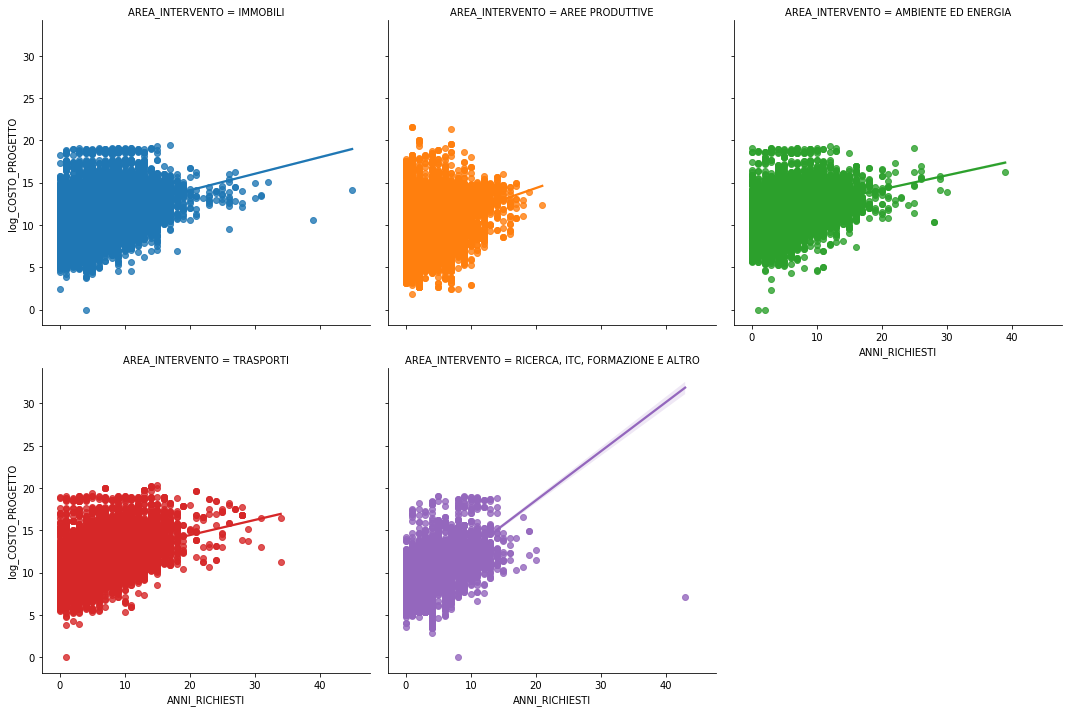

In [32]:
#sns.regplot(data=chiusi.sample(3000), x='ANNI_RICHIESTI', y='log_COSTO_PROGETTO', hue='SETTORE_INTERVENTO')
axSplit = sns.lmplot( x='ANNI_RICHIESTI', y='log_COSTO_PROGETTO', data=chiusi.sample(300000), 
                        truncate=True, hue='AREA_INTERVENTO', col='AREA_INTERVENTO', col_wrap=3)

In [33]:
# parsing pIva / COD FISCALE
cup_std = cup.copy()

def standardize_titolare(col):
    n_fixed = 0
    for i_row, row_values in enumerate(col):
        assert isinstance(row_values, str), 'Please provide strings as input values'
        # detect NaNs
        if row_values in ('NaN', 'nan'):
            col[i_row] = 'NaN'
        # check if a letter is present, in which case it should be a valid Fiscal Code:
        elif any([l.isalpha() for l in row_values]):
            if not codicefiscale.isvalid(row_values):
                print('Invalid codice fiscale with letters %s' % row_values)
        else:    
            # it should be a partita iva, convert to int and pad to 11 chars
            col[i_row] = str(int(float(row_values))).rjust(11, '0')
            if col[i_row] != row_values:
                n_fixed += 1
    print('Fixed %i lines' % n_fixed)
    return col

In [34]:
cup_std.PIVA_CODFISCALE_SOG_TITOLARE = \
    standardize_titolare(cup_std.PIVA_CODFISCALE_SOG_TITOLARE.values.astype(str))

Invalid codice fiscale with letters BCCFLC59019A285L
Fixed 784105 lines


In [36]:
cup_std[cup_std.PIVA_CODFISCALE_SOG_TITOLARE == 'BCCFLC59019A285L']

,CUP,DESCRIZIONE_SINTETICA_CUP,ANNO_DECISIONE,STATO_PROGETTO,COSTO_PROGETTO,FINANZIAMENTO_PROGETTO,CODICE_STATO,STATO,CODICE_AREA_GEOGRAFICA,AREA_GEOGRAFICA,...,COD_GRUPPO_ATECO,GRUPPO_ATECO,COD_CLASSE_ATECO,CLASSE_ATECO,COD_CATEGORIA_ATECO,CATEGORIA_ATECO,COD_SOTTOCATEG_ATECO,SOTTOCATEGORIA_ATECO,log_COSTO_PROGETTO,short_CATEGORIA_INTERVENTO
654828,G24B09000070006,RESTAURO DELLE SUPERFICI DECORATE DI PALAZZO F...,2009,ATTIVO,270000,270000,5,ITALIA,S,SUD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.506177,MUSEI ARCHIVI E BIBLIOTECHE


In [ ]:
(cup.PIVA_CODFISCALE_SOG_TITOLARE.nunique(), cup_std.PIVA_CODFISCALE_SOG_TITOLARE.nunique())

In [ ]:
grpby_by_titolare = cup_std.groupby(['PIVA_CODFISCALE_SOG_TITOLARE', 'STATO_PROGETTO'])
data_by_titolare = grpby_by_titolare.agg({'CUP': 'count', 'COSTO_PROGETTO': 'sum'})
data_by_titolare.sort_values('COSTO_PROGETTO', ascending=False, inplace=True)
data_by_titolare

The most influential owners have a lot of different projects and account for a very large proportion of the total cost. The top 10 alone have over 2,5MM budget!

In [ ]:
# Plot cumulative number of different owners of active projects against cumulative cost
plt.semilogx(np.arange(data_by_titolare.xs('ATTIVO', level=1).shape[0])+1,
         data_by_titolare.xs('ATTIVO', level=1).COSTO_PROGETTO.cumsum())
plt.xlabel('Cumulative number of different owners')
plt.ylabel('Total cumulative cost of active projects')
plt.show()

### Plot the ratio between project cost and number of projects for the different subject areas

In [ ]:
grpby_by_area_titolare = cup_std[cup_std['STATO_PROGETTO']=='ATTIVO'].groupby(['AREA_SOGGETTO','PIVA_CODFISCALE_SOG_TITOLARE'])
data_by_area_titolare = grpby_by_area_titolare.agg({'CUP': 'count', 'COSTO_PROGETTO': 'sum'})
data_by_area_titolare.sort_values('COSTO_PROGETTO', ascending=False, inplace=True)

In [ ]:
log_data_by_area_titolare = data_by_area_titolare.apply(np.log10).reset_index(level=0)
# plot top 100 (high total cost per single owner)
sns.lmplot(data=log_data_by_area_titolare.head(100), y='CUP', x='COSTO_PROGETTO', hue= 'AREA_SOGGETTO')
plt.show()

### Export cleaned codice fiscale/ P.iva for joins with other data

In [ ]:
cup_std[cup_std.PIVA_CODFISCALE_SOG_TITOLARE == '02196020263'].AREA_SOGGETTO

In [ ]:
export_data = cup_std.groupby(['AREA_SOGGETTO','PIVA_CODFISCALE_SOG_TITOLARE', 'STATO_PROGETTO']).agg(
    {'CUP': 'count', 'COSTO_PROGETTO': 'sum'})
export_data.rename({'COSTO_PROGETTO': 'totale_costi_progetti', 
                    'PIVA_CODFISCALE_SOG_TITOLARE': 'codice_fiscale_titolare_opencup',
                    'AREA_SOGGETTO': 'area_titolare_opencup',
                    'CUP':'numero_totale_cup_titolare'})
export_data.to_csv('sintesi_partite_iva_opencup.csv', sep=';')

In [ ]:
pd.read_csv('sintesi_partite_iva_opencup.csv', sep=';')

In [ ]:
ratios = log_data_by_area_titolare.CUP/log_data_by_area_titolare.COSTO_PROGETTO
ratios.name = 'Fragmentation'

In [ ]:
info = cup_std[['PIVA_CODFISCALE_SOG_TITOLARE',
         'SOGGETTO_TITOLARE']].drop_duplicates().set_index('PIVA_CODFISCALE_SOG_TITOLARE')

In [ ]:
ratios.to_frame().join(info).sort_values('Fragmentation', ascending=False)

In [ ]:
all_codes = cup_std.CODICE_LOCALE_PROGETTO.unique()

In [ ]:
pd.Series(all_codes).to_csv('codici_progetto_interni_opencup.csv')